<a href="https://colab.research.google.com/github/ShinJonghyeok/Machine-Learning-Project/blob/main/Gotcha_Fake_News.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gotcha Fake News!


20180351 Jonghyeok Shin

---

Overview :

The development of social media and the resulting fake news are on the rise. We need a way to distinguish fake news which causes multiple damages to society. In this project, I tried to show how to create a model that distinguishes fake news with LSTM. Also, analyzed some features of fake news.

## Introduction

In the lecture, we learned the basic mathematics of machine learning, several models, and several features. I think that the content of preprocessing the data was not specific. So, I would like to create a process of creating a machine learning model including preprocessing with the interesting topic of 'fake news'.

### Fake News

![FAKENEWS_PIC](https://justsearch.fr/wp-content/uploads/2020/11/Visuel-blog-JS-6-2.png)

**Fake news** is false or misleading information presented as news. They have no basis or weak basis in fact, but are presented as being facutally accurate.


Fake news is just fake information, then why is fake news dangerous?

Fake news can reduce the impact of real news by competing with it. It decreases credibility of news generally. Therefore people have to distinguish what is real or fake rather than just accepting information.
Moreover, fake news have more provocative titles so people tend to access fake news easily.
Also, there are more shortages. The reputation of politicians and celebrities is also tarnished. Fake news can be used to win elections, to earn money, or to win cyber-war.

How fake news could be so popular?

Nowadays, many people get more information from modern media such as social media and websites than from old media such as newspapers and magazines. And nature of online business encourages production of information that is "click-worthy" and independent of its accuracy. So people tend to access fake news online. As the Internet becomes an increasingly important part of our lives, fake news gets popular.

Internet is already deeply involved in our lives. So it's hard to avoid fake news. Therefore, we need a way to tell if information is real or fake.

### NLP

> Natural language processing (NLP) is an interdisciplinary subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to process and analyze large amounts of natural language data. The goal is a computer capable of "understanding" the contents of documents, including the contextual nuances of the language within them. The technology can then accurately extract information and insights contained in the documents as well as categorize and organize the documents themselves.

cite : https://en.wikipedia.org/wiki/Natural_language_processing

I would like to apply LSTM(we learned with RNN!) to distinguish news is real or fake.

### LSTM

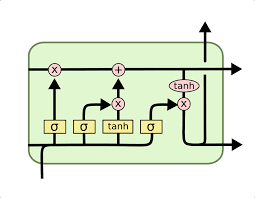

> Long short-term memory (LSTM)[1] is an artificial neural network used in the fields of artificial intelligence and deep learning. Unlike standard feedforward neural networks, LSTM has feedback connections. Such a recurrent neural network (RNN) can process not only single data points (such as images), but also entire sequences of data (such as speech or video). This characteristic makes LSTM networks ideal for processing and predicting data.

cite : https://en.wikipedia.org/wiki/Long_short-term_memory
We learned that LSTM is highly complicated and has high complexity. But it has high accuracy.

## Installation for code

In [ ]:
!pip install keras.preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.1 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import keras
import re
import gensim
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, accuracy_score
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Dataset

I brought some data from Kaggle. "Fake and real news dataset"

There are two files. One is a file about real news, and the other is a file about fake news. The description of each column is as follows.

title : The title of the article

text : The text of the article

subject : The subject of the article

date : The date at which the article was posted

At first, download data files.

In [ ]:
url_fake = 'https://raw.githubusercontent.com/ShinJonghyeok/Machine-Learning-Project/main/Fake.csv'
url_true = 'https://raw.githubusercontent.com/ShinJonghyeok/Machine-Learning-Project/main/True.csv'
df_fake = pd.read_csv(url_fake)
df_true = pd.read_csv(url_true)

## Data Features and Preprocessing

Take a look at fake news first.

In [ ]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


First, we can distinguish data by subject

There are 9050 News news
There are 6841 politics news
There are 4459 left-news news
There are 1570 Government News news
There are 783 US_News news
There are 778 Middle-east news


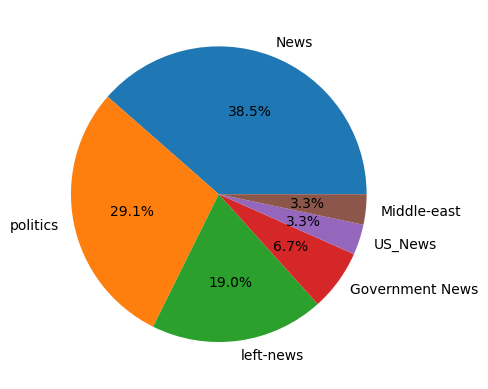

<Figure size 800x400 with 0 Axes>

In [ ]:
sub, nu = [], []
for subject, num in df_fake.subject.value_counts().items():
  print(f"There are {num} {subject} news")
  sub.append(subject)
  nu.append(num)

plot_pie = pd.Series(nu, index = sub).plot.pie(autopct = '%0.1f%%')
plt.figure(figsize = (8, 4))
plt.show()

Features expressed by word cloud

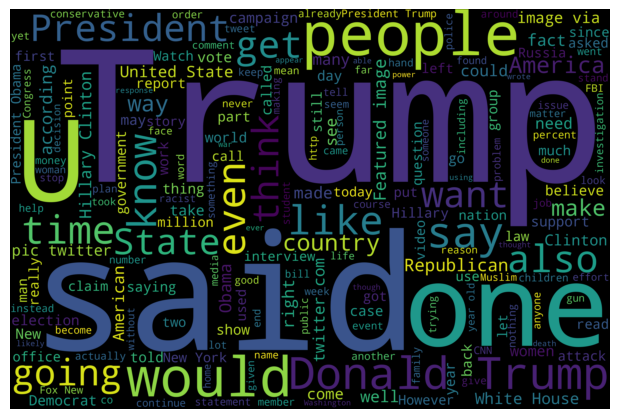

In [ ]:
text = ''
for t in df_fake.text.values:
  text += f"{t}"
wordcloud = WordCloud(width = 3000, height = 2000, stopwords = set(nltk.corpus.stopwords.words('english'))).generate(text)
fig = plt.figure(figsize = (8, 4))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
del text

We observe Trump, Donald Trump, people, one, said, U, would as a big portion of the cloud. We can treat some words as stopwords as 'one', 'said', 'U', 'would'

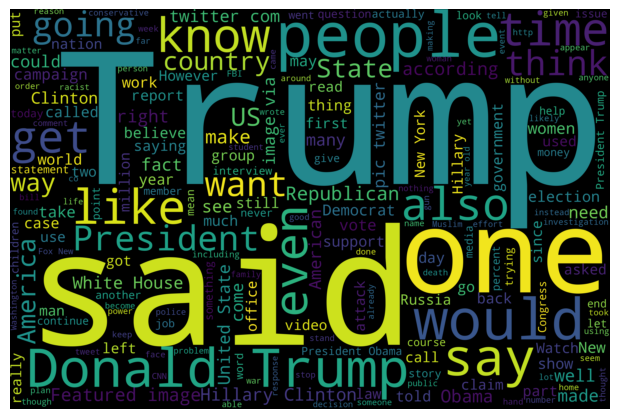

In [ ]:
stopwrds = set(nltk.corpus.stopwords.words('english'))
stopwrds.update(['U'])
text = ''
for t in df_fake.text.values:
  text += f"{t}"
wordcloud = WordCloud(width = 3000, height = 2000, stopwords = stopwrds).generate(text)
fig = plt.figure(figsize = (8, 4))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
del text

Now we see our words as well.

As mentioned in the introduction, the bad effect of fake news is to discredit politicians or make them look better than they really are. Regardless of whether the news speaks good or bad about Trump, we can observe a large amount of fake news talking about Trump.

How about real news?

In [ ]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


Data distinguished by subject

There are 11272 politicsNews news
There are 10145 worldnews news


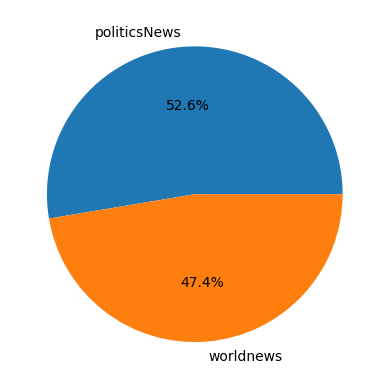

<Figure size 800x400 with 0 Axes>

In [ ]:
sub, nu = [], []
for subject, num in df_true.subject.value_counts().items():
  print(f"There are {num} {subject} news")
  sub.append(subject)
  nu.append(num)

plot_pie = pd.Series(nu, index = sub).plot.pie(autopct = '%0.1f%%')
plt.figure(figsize = (8, 4))
plt.show()

Features expressed by word cloud

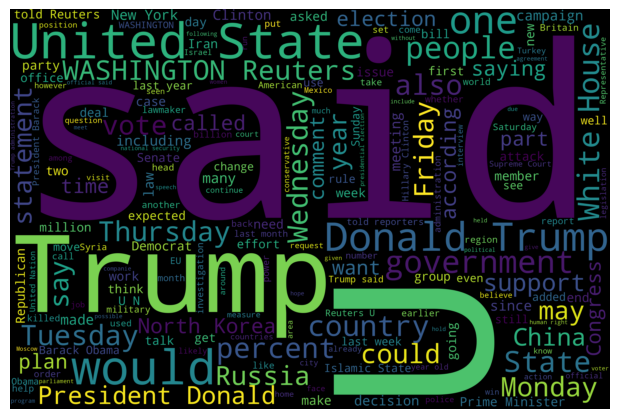

In [ ]:
text = ''
for t in df_true.text.values:
  text += f"{t}"
wordcloud = WordCloud(width = 3000, height = 2000, stopwords = set(nltk.corpus.stopwords.words('english'))).generate(text)
fig = plt.figure(figsize = (8, 4))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
del text

We can observe that there are several "~ (Reuters) -" to include source of publication. And also it is in word cloud.

Now we can remove source if there exist source parts by spliting with " -" form.

In [ ]:
no_source = []
maxlen = 0
maxidx = 0

for idx, text in enumerate(df_true.text.values):
  try :
    check = text.split(" -", maxsplit = 1)
    if len(check) == 2:
      if maxlen < len(check[0]):
        maxlen = len(check[0])
        maxidx = idx
  except:
    no_source.append(idx)

print(maxlen, maxidx)

3309 9618


In [ ]:
print(df_true['text'][9618:9619])

9618    GOP leaders have unleashed a stunning level of...
Name: text, dtype: object


There are some abnormal length values of source since there are no source. Thus we can assume that there exists maximum length for source 200.

Then code will be like following.

In [ ]:
no_source = []

for idx, row in enumerate(df_true.text.values):
  try :
    check = row.split(" -", maxsplit = 1)
    check[1]
    assert(len(check[0])<200)
  except:
    no_source.append(idx)

print(no_source)
print(len(no_source))

[7, 8, 12, 13, 17, 27, 40, 70, 97, 122, 140, 192, 233, 257, 284, 308, 362, 384, 453, 459, 495, 531, 1076, 1081, 1112, 1146, 1179, 1341, 1381, 1451, 1509, 1539, 1570, 1611, 1645, 1659, 1696, 1711, 1726, 1730, 1748, 1768, 1824, 1826, 1878, 1885, 1932, 1952, 1967, 2012, 2023, 2056, 2087, 2100, 2102, 2120, 2140, 2171, 2187, 2247, 2262, 2275, 2313, 2315, 2355, 2383, 2392, 2442, 2486, 2510, 2518, 2557, 2602, 2658, 2776, 2811, 2855, 2885, 2922, 3270, 3488, 3615, 3782, 3930, 3944, 3976, 4170, 4198, 4206, 4307, 4358, 4465, 5246, 5290, 5379, 5412, 5504, 5538, 5588, 5593, 5784, 6387, 6660, 6823, 7568, 7922, 8194, 8195, 8247, 8465, 8481, 8482, 8505, 8506, 8771, 8970, 9008, 9009, 9307, 9603, 9618, 9737, 10479, 10745, 11340, 13114, 14496, 19616, 19715, 19774, 19904]
131


In [ ]:
print(df_true['text'][7:9])

7    The following statements were posted to the ve...
8    The following statements were posted to the ve...
Name: text, dtype: object


Source from twitter is contained as no_publisher. We need to find the maximum length of check[0] where twitter source is contained as well as other sources.

In [ ]:
no_source = []

for idx, row in enumerate(df_true.text.values):
  try :
    check = row.split(" -", maxsplit = 1)
    check[1]
    assert(len(check[0])<259)
  except:
    no_source.append(idx)

print(no_source)
print(len(no_source))

[3488, 4358, 4465, 5784, 6660, 6823, 7922, 8194, 8195, 8247, 8465, 8481, 8482, 8505, 8506, 8771, 8970, 9008, 9009, 9307, 9618, 9737, 10479]
23


In [ ]:
df_true.iloc[no_source].text

3488     The White House on Wednesday disclosed a group...
4358     Neil Gorsuch, President Donald Trump’s appoint...
4465     WASHINGTON The clock began running out this we...
5784     Federal appeals court judge Neil Gorsuch, the ...
6660     Republican members of Congress are complaining...
6823     Over the course of the U.S. presidential campa...
7922     After going through a week reminiscent of Napo...
8194     The following timeline charts the origin and s...
8195     Global health officials are racing to better u...
8247     U.S. President Barack Obama visited a street m...
8465     ALGONAC, MICH.—Parker Fox drifted out of the D...
8481     Global health officials are racing to better u...
8482     The following timeline charts the origin and s...
8505     Global health officials are racing to better u...
8506     The following timeline charts the origin and s...
8771     In a speech weighted with America’s complicate...
8970                                                    

Observing they have no source. We can take 259 as max source length. Meanwhile, 8970th row has no text. We have to erase the row since it has null value. I'd like to distinguish 'source' and 'real text' before erasing null valued row since it will change indices of df_true.

In [ ]:
source = []
real_text = []

for idx, row in enumerate(df_true.text.values):
  if idx in no_source:
    real_text.append(row)
    source.append("UNKNOWN")
    continue
  check = row.split(" -", maxsplit = 1)
  source.append(check[0])
  real_text.append(check[1])

df_true['source'] = source
df_true['text'] = real_text

del source, real_text, check, no_source

In [ ]:
df_true.head()

,title,text,subject,date,source
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fi...,politicsNews,"December 29, 2017",WASHINGTON (Reuters)
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links be...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos to...,politicsNews,"December 30, 2017",WASHINGTON (Reuters)
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Pos...,politicsNews,"December 29, 2017",SEATTLE/WASHINGTON (Reuters)


In [ ]:
no_text = []

for idx, txt in enumerate(df_true.text.values):
  if str(txt).strip() == '':
    no_text.append(idx)

print(no_text)

[8970]


We should drop 8970th row.

In [ ]:
df_true = df_true.drop(labels = no_text)

In [ ]:
no_text = []

for idx, txt in enumerate(df_true.text.values):
  if str(txt).strip() == '':
    no_text.append(idx)

print(no_text)
del no_text

[]


We divided text into source and real_text. Now we can predict that there would be less sources in word cloud.

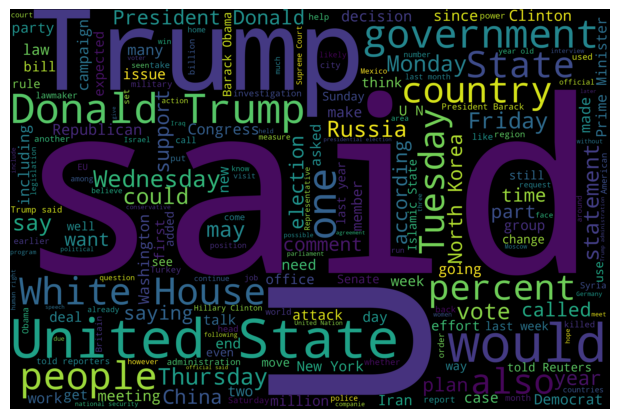

In [ ]:
text = ''
for t in df_true.text.values:
  text += f"{t}"
wordcloud = WordCloud(width = 3000, height = 2000, stopwords = set(nltk.corpus.stopwords.words('english'))).generate(text)
fig = plt.figure(figsize = (8, 4))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
del text

Check whether it is in fake news case.

In [ ]:
no_text = []

for idx, txt in enumerate(df_fake.text.values):
  if str(txt).strip() == '':
    no_text.append(idx)

print(no_text)
print(len(no_text))

df_fake.iloc[no_text]

[10923, 11041, 11190, 11225, 11236, 11241, 11247, 11249, 11267, 11268, 11283, 11284, 11285, 11289, 11290, 11292, 11295, 11296, 11301, 11303, 11304, 11305, 11309, 11314, 11317, 11319, 11322, 11330, 11334, 11335, 11340, 11343, 11348, 11351, 11352, 11357, 11371, 11373, 11374, 11382, 11397, 11402, 11403, 11409, 11410, 11412, 11415, 11419, 11421, 11427, 11431, 11432, 11440, 11448, 11450, 11453, 11462, 11464, 11465, 11472, 11473, 11475, 11478, 11489, 11491, 11493, 11494, 11501, 11505, 11507, 11520, 11531, 11532, 11533, 11538, 11542, 11547, 11549, 11551, 11559, 11563, 11581, 11585, 11589, 11590, 11614, 11624, 11625, 11627, 11631, 11636, 11637, 11643, 11650, 11658, 11661, 11672, 11679, 11681, 11684, 11686, 11688, 11692, 11708, 11718, 11729, 11739, 11753, 11765, 11768, 11777, 11782, 11786, 11788, 11792, 11793, 11803, 11806, 11813, 11821, 11831, 11832, 11841, 11844, 11848, 11854, 11858, 11860, 11863, 11866, 11872, 11874, 11875, 11879, 11881, 11884, 11889, 11893, 11900, 11904, 11906, 11913, 11914

,title,text,subject,date
10923,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017"
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017"
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017"
11225,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,politics,"Apr 2, 2017"
11236,SHOCKER: Public School Turns Computer Lab Into...,,politics,"Apr 1, 2017"
...,...,...,...,...
21816,BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...,,left-news,"Apr 27, 2015"
21826,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015"
21827,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015"
21857,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015"


But titles seems to be the texts themselves in capital letters.

Thus we combine title and text in df_fake and df_true also.

In [ ]:
df_fake['text'] = df_fake['title'] + " " + df_fake['text']
df_true['text'] = df_true['title'] + " " + df_true['text']

In [ ]:
lowertext = []

for idx, row in enumerate(df_fake.text.values):
  row = row.lower()
  lowertext.append(row)
df_fake['text'] = lowertext

lowertext = []

for idx, row in enumerate(df_true.text.values):
  row = row.lower()
  lowertext.append(row)
df_true['text'] = lowertext

We should drop title since it is in text now. Also, different features like subject, date, source should be dropped since df_fake and df_true has different values or no value.

In [ ]:
df_fake = df_fake.drop(['title', 'subject', 'date'], axis = 1)
df_true = df_true.drop(['title', 'subject', 'date', 'source'], axis = 1)

Label fake news as 0, real news as 1. And merge them into one dataframe.

In [ ]:
df_fake['class'] = 0
df_true['class'] = 1

combined_df = pd.concat([df_true, df_fake])
combined_df

,text,class
0,"as u.s. budget fight looms, republicans flip t...",1
1,u.s. military to accept transgender recruits o...,1
2,senior u.s. republican senator: 'let mr. muell...,1
3,fbi russia probe helped by australian diplomat...,1
4,trump wants postal service to charge 'much mor...,1
...,...,...
23476,mcpain: john mccain furious that iran treated ...,0
23477,justice? yahoo settles e-mail privacy class-ac...,0
23478,sunnistan: us and allied ‘safe zone’ plan to t...,0
23479,how to blow $700 million: al jazeera america f...,0


Now we are ready to make text to vector!

We have texts as X, and class as Y.

And before making inferences, we want to eliminate punctuations, stopwords and single characters since they will not be the good estimator.

Also, I should make sentences into lower cases since words which are different in capital or smaller one should be treated as same. (Considering df_fake's data which has only capital title without text)

In [ ]:
X = []
stop_wrds = set(nltk.corpus.stopwords.words('english'))
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
for param in combined_df["text"].values:
    temp = []
    sents = nltk.sent_tokenize(param)
    for sent in sents:
        sent = sent.lower()
        tokens = tokenizer.tokenize(sent)
        filtered = []
        for i in tokens :
           if i not in stop_wrds and len(i)>1:
             filtered.append(i.strip())
        temp.extend(filtered)
    X.append(temp)
Y = combined_df['class']

Since making embedding for natural languages is too time-consuming, I decided to import an embedding model called word2vec.

In [ ]:
embed_dim = 100

w2v_model = gensim.models.Word2Vec(sentences = X, vector_size = embed_dim, window = 5, min_count = 1)

In [ ]:
len(w2v_model.wv.key_to_index)

122248

Now we have embedding model with 122248 words expressed by 100-dim vector!

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

X = tokenizer.texts_to_sequences(X)

In [ ]:
word_idx = tokenizer.word_index
for word, num in word_idx.items():
  print(word, num)
  if num > 10:
    break

trump 1
said 2
president 3
would 4
people 5
one 6
state 7
new 8
obama 9
also 10
clinton 11


Let's find out how many words are in each text.

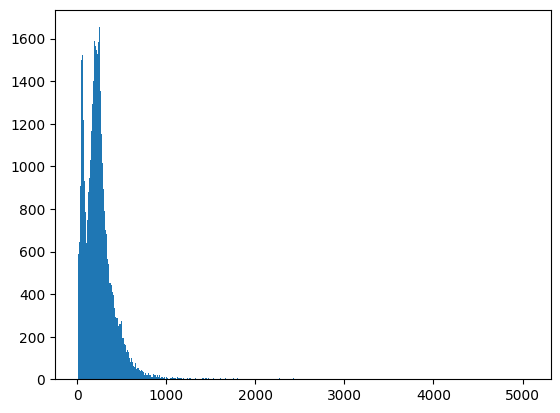

In [ ]:
lenlist = []
for x in X:
  lenlist.append(len(x))

plt.hist(lenlist, bins = 500)
plt.show()

Rather than covering too wide a range of text, it seems better to reduce complexity by covering a range where the majority of text is distributed.

In [ ]:
distr = 0
for i in lenlist:
  if i<600:
    distr+=1

print(distr)

43336


I think 600 is a reasonable value for this dataset.

In [ ]:
lenlimit = 600

X = pad_sequences(X, maxlen = lenlimit)

In [ ]:
X[0][:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

As we can see, sentences which have less words than limit length are padded by 0s.

We made 0 as padding. And we can make unknown words into 0. So we need 1 more space for 0. Indices made by tokenizer was starting with 1.

In [ ]:
diction_size = len(tokenizer.word_index) + 1

In [ ]:
def make_weightmatrix(model, diction):
  diction_size = len(diction) + 1
  weightmatrix = np.zeros((diction_size, embed_dim))

  for word, num in diction.items():
    weightmatrix[num] = model.wv[word]
  return weightmatrix

In [ ]:
embed_vecs = make_weightmatrix(w2v_model, word_idx)

Build the model which uses weightmatrix with word2vec, LSTM model.

In [ ]:
model = Sequential()
model.add(Embedding(diction_size, output_dim = embed_dim, weights = [embed_vecs], input_length = lenlimit, trainable=False))

model.add(LSTM(units = 128))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['acc'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 600, 100)          12224900  
                                                                 
 lstm_1 (LSTM)               (None, 128)               117248    
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 12,342,277
Trainable params: 117,377
Non-trainable params: 12,224,900
_________________________________________________________________


Divide train set and test set.

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

Fitting model to train sets.

**This code takes about 73minutes in Google Colab. But there is executed result. You can read result first or execute code as well.**

In [ ]:
model.fit(X_train, Y_train, validation_split = 0.2, epochs = 5)

Epoch 1/5
842/842 [==============================] - 898s 1s/step - loss: 0.0861 - acc: 0.9709 - val_loss: 0.0649 - val_acc: 0.9765
Epoch 2/5
842/842 [==============================] - 915s 1s/step - loss: 0.0433 - acc: 0.9851 - val_loss: 0.0316 - val_acc: 0.9887
Epoch 3/5
842/842 [==============================] - 885s 1s/step - loss: 0.0349 - acc: 0.9883 - val_loss: 0.0286 - val_acc: 0.9918
Epoch 4/5
842/842 [==============================] - 851s 1s/step - loss: 0.0206 - acc: 0.9933 - val_loss: 0.0191 - val_acc: 0.9932
Epoch 5/5
842/842 [==============================] - 844s 1s/step - loss: 0.0157 - acc: 0.9953 - val_loss: 0.0441 - val_acc: 0.9859


Model is now available.

In [ ]:
Y_pred = (model.predict(X_test)>=0.5).astype('int')

351/351 [==============================] - 106s 300ms/step


In [ ]:
accuracy_score(Y_test, Y_pred)

0.9845879732739421

98.46% accuracy! which is very high.

In [ ]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      5862
           1       0.97      1.00      0.98      5363

    accuracy                           0.98     11225
   macro avg       0.98      0.99      0.98     11225
weighted avg       0.98      0.98      0.98     11225



As we learned in class, LSTM is highly complicated model. But accuracy is good to see.

## Conclusion

As mentioned in the introduction, fake news aggressively disrupts various information, such as attaching clickable titles. Since we live in a world inseparable from the Internet and techniques for fake news are gradually evolving, I think we need a method to detect fake news. There are several fake news stories that are not covered in this dataset. I think it would be easier to identify fake news if we created a model by collecting such datasets one by one.

Besides LSTM, there are other implementation methods. However, in this project, we focused on how accurate and time-consuming LSTM is. It would be good to compare it with other models in future projects.

Finally, implemented fake news detection through LSTM. In addition to the theoretical content learned in class, it seems that there are also things that can be learned by actually handling data. In particular, in the case of preprocessing, it seems that it was important to decide what to consider as important or what kind of calibration to do according to the situation. In addition to LSTM, many machine learning models have already been implemented. I hope that this project will serve as an opportunity and foundation for many future projects.

